# 3-4: Autoencoder를 iris 데이터에 적용

**버전 문제로 아래 코드를 추가**

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
## 필요한 라이브러리를 불러들임 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## iris 데이터 불러오기
url='https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
iris = pd.read_csv(url)

## iris 데이터를 입력 데이터와 출력 데이터로 분리        
irisX = np.array(iris.iloc[:,:4])
irisY = iris.iloc[:,4]   

## 입력 데이터의 min-max 정규화 
minmax = np.amin(irisX, 0), np.amax(irisX, 0)
no_irisX = (irisX-minmax[0])/(minmax[1]-minmax[0])

In [5]:
## 학습관련 매개변수 설정 
n_input     = 4
n_hidden    = 2  
n_output = n_input
learning_rate = 0.01
n_class = 3
num_epoch = 1000

In [6]:
## 오토인코더 구축 및 계산
X = tf.compat.v1.placeholder(tf.float32, shape=[None, n_input])
hidden = tf.keras.layers.Dense(n_hidden, activation=None)(X)
output = tf.keras.layers.Dense(n_output, activation=None)(hidden)

reconstruction_loss = tf.reduce_mean(tf.square(output - X))
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

codings = hidden

In [7]:
## 텐서플로 그래프 실행
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # 학습 시작  
    for iteration in range(num_epoch):
        sess.run(training_op, feed_dict={X: no_irisX})
    
    codings_val = codings.eval(feed_dict={X: no_irisX})

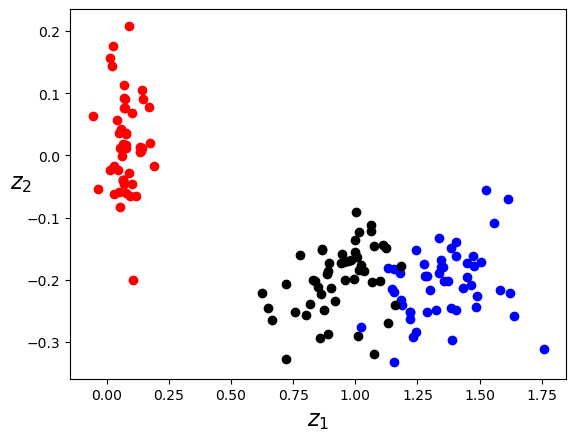

In [8]:
## 오토인코더 은닉노드의 값 산점도
plt.scatter(codings_val[np.where(irisY=='setosa')[0], 0], codings_val[np.where(irisY=='setosa')[0], 1], color = 'red')
plt.scatter(codings_val[np.where(irisY=='virginica')[0], 0], codings_val[np.where(irisY=='virginica')[0], 1], color = 'blue')
plt.scatter(codings_val[np.where(irisY=='versicolor')[0], 0], codings_val[np.where(irisY=='versicolor')[0], 1], color = 'black')
plt.xlabel("$z_1$", fontsize=16)
plt.ylabel("$z_2$", fontsize=16, rotation=0)
plt.show()